# Simplicity and Depression - K means 

# Objective:
To determine if there is a relationship between higher levels of black and white thinking and higher levels of self-reported 
depression in psychiatric patients hospitalized for depression.Also apply K means clustering and assign groups for model prediction

# Context:
It is common for people who tend to think of their reality as a series of black and white events to suffer from depression. 
Psybersquare, Inc. describes a few examples of this way of thinking by saying that those who suffer from this way of thinking 
think that, "If things aren't 'perfect,' then they must be "horrible." If your child isn't "brilliant" then he must be 'stupid.' 
If you're not 'fascinating' then you must be 'boring.'" This can be a difficult way to live since those suffering from this way 
of thinking may never feel that their reality is “good enough”. 

# Data Sources:
The data used for this study is from the Ginzberg data frame which is based on psychiatric patients hospitalized for depression. 
Data is from the book Applied Regression Analysis and Generalized Linear Models, Second Edition by Fox, J. (2008). The dataset 
includes three variables - simplicity (black and white thinking), fatalism, and depression. The data also includes these 
variables each adjusted by regression for other variables thought to influence depression. For the purposes of this study, we 
will use the non-adjusted values. Ginzberg Dataset on Depression display_output(Ginzberg, out_type) simplicity fatalism 
depression adjsimp adjfatal adjdep 

Here, "Black and white thinking" is referred as "Simplicity"

In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [23]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

from scipy.stats import zscore
from scipy.spatial.distance import cdist

In [24]:
# reading the CSV file into pandas dataframe
mydata = pd.read_csv("Depression.csv")

In [25]:
# adh variables derived by regression by applying adjusted values. 

In [26]:
mydata.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [27]:
##Remove id since it is redundant
mydata.drop('id', axis=1, inplace=True)

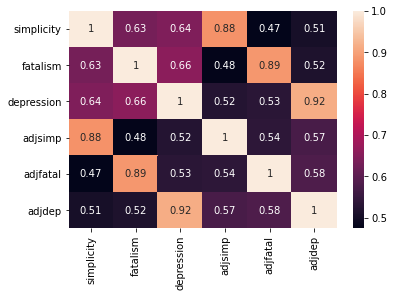

In [28]:
corr = mydata.corr()
sns.heatmap(corr, annot = True)
# adjusted variables correlated with normal variables


In [29]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


In [30]:
# Summary Stats
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


In [31]:
mydata.skew()

simplicity    1.248528
fatalism      0.224419
depression    0.612414
adjsimp       1.261044
adjfatal      0.268819
adjdep        0.871735
dtype: float64

In [32]:
mydata.kurt()

simplicity    1.723582
fatalism     -0.091335
depression   -0.807520
adjsimp       2.312699
adjfatal      0.006982
adjdep        0.957878
dtype: float64

In [33]:
mydata.drop(columns = {'simplicity', 'fatalism','depression'}, inplace=True)
# drop strongly correlated

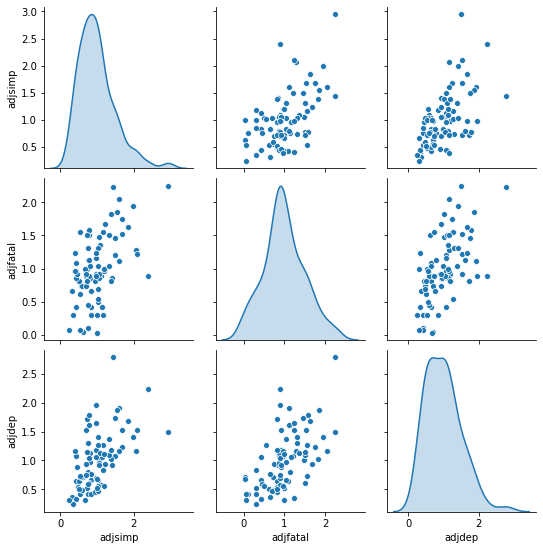

In [34]:
sns.pairplot(mydata, diag_kind='kde') 
# Dont see that many clusters - perhaps try 2 /3 clusters, small bump on couple of hist. 

In [35]:
##Based on the kde plots, we can work with 2 or 3 clusters

In [36]:
##Scale the data

mydata_z = mydata.apply(zscore)
# Standardize

In [37]:
# Example application of K Means Model
# Apply K Means Model
model=KMeans(n_clusters=5)
model.fit(mydata)
model

KMeans(n_clusters=5)

In [38]:
# Get classes
prediction=model.predict(mydata)
prediction

array([0, 2, 0, 0, 2, 2, 0, 4, 0, 3, 0, 0, 0, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 4, 2,
       3, 2, 2, 1, 2, 1, 3, 2, 4, 2, 3, 4, 2, 2, 4, 3, 3, 3, 3, 3, 1, 3,
       1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 4, 4, 1, 3, 3])

In [39]:
# Cluster Centers
model.cluster_centers_

array([[0.73885824, 0.33367706, 0.53278824],
       [1.91935545, 1.58223182, 1.75832364],
       [0.70792893, 0.95276107, 0.72514857],
       [0.9875425 , 1.02325875, 1.38826875],
       [1.27038   , 1.587347  , 1.108459  ]])

In [40]:
mydata.head(5)

,adjsimp,adjfatal,adjdep
0,0.75934,0.10673,0.41865
1,0.72717,0.99915,0.51688
2,0.62176,0.03811,0.70699
3,0.83522,0.42218,0.65639
4,0.47697,0.81423,0.53518


In [41]:
# Distance between centroids and data points - lower the better
sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1))

34.103776831213985

In [42]:
# Score - lower values are better
model.inertia_

17.69218857556654

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

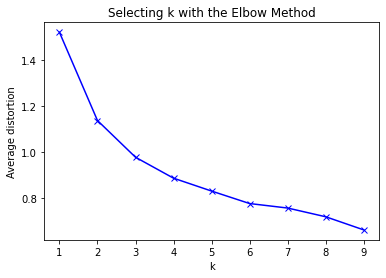

In [43]:
#Finding optimal no. of clusters - Elblow Method
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata_z)
    prediction=model.predict(mydata_z)
    meanDistortions.append(sum(np.min(cdist(mydata_z, model.cluster_centers_, 'euclidean'), axis=1)) / mydata_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

# Elbow method and euclidean distance Qn - How many clusters would you guys choose ?
# Major gain known by 3. 

In [44]:
#Set the value of k=6 - as a starting pt
kmeans = KMeans(n_clusters=6, n_init = 15, random_state=2345)
# Initialization method has big effect so have multiple choices. k-means++ smarter way. , 
# max_iter - have cut off if they dont converge
# Get back labels, cluster centers and inertia as before
kmeans.fit(mydata_z)

KMeans(n_clusters=6, n_init=15, random_state=2345)

In [45]:
centroids = kmeans.cluster_centers_

In [46]:
centroids

array([[ 0.07789966, -0.29234334,  0.56492518],
       [-0.57436601, -1.35119281, -1.00630038],
       [ 1.83513691,  1.16782514,  1.16703471],
       [ 0.14313589,  0.87891791,  0.44896126],
       [ 0.88662427,  2.49264672,  3.59726278],
       [-0.64114511, -0.08540729, -0.586397  ]])

In [47]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(mydata_z) )

In [48]:
print(centroid_df)
# Get Centroid and coordinates on each of the columns, This tell first centrod very central for simp, higher for dep
# Clutser 4 - high for Dep. - analyze why higher. Cluster 1 - why negative values. 

    adjsimp  adjfatal    adjdep
0  0.077900 -0.292343  0.564925
1 -0.574366 -1.351193 -1.006300
2  1.835137  1.167825  1.167035
3  0.143136  0.878918  0.448961
4  0.886624  2.492647  3.597263
5 -0.641145 -0.085407 -0.586397


In [49]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
# Get label for each point and add back to dataframe

In [50]:
# Joining the label dataframe with the data frame.
df_labeled = mydata.join(df_labels)

In [51]:
df_labeled.shape

(82, 4)

In [53]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(25) # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,adjsimp,adjfatal,adjdep,labels
0,0.75934,0.10673,0.41865,1
1,0.72717,0.99915,0.51688,5
2,0.62176,0.03811,0.70699,1
3,0.83522,0.42218,0.65639,1
4,0.47697,0.81423,0.53518,5
...,...,...,...,...
77,0.72117,1.50039,1.14913,3
78,1.59752,2.05016,1.16443,2
79,2.39515,0.88910,2.24452,2
80,1.31493,1.04058,1.37153,0


In [54]:
df_labeled['labels'].value_counts()
# Not great choice for clusters as Cluster 4 has only 1 data point

5    26
1    16
0    14
3    13
2    12
4     1
Name: labels, dtype: int64

In [56]:
# Distance between centroids and data points - lower the better
print("Cluster Distances",sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1)))
# Score - lower values are better
print("Inertia",model.inertia_)

Cluster Distances 65.34257556138408
Inertia 43.858937367655365


In [57]:
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

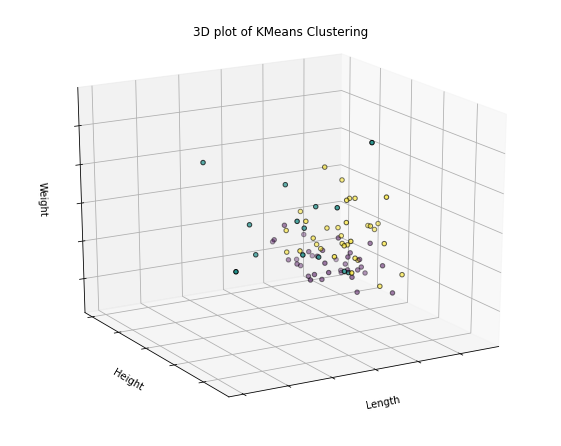

In [58]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(mydata_z)
labels = k3_model.labels_
ax.scatter(mydata_z.iloc[:, 0], mydata_z.iloc[:, 1], mydata_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
# 3D plot easy to see seperation 

Text(0.5, 0.92, '3D plot of KMeans Clustering')

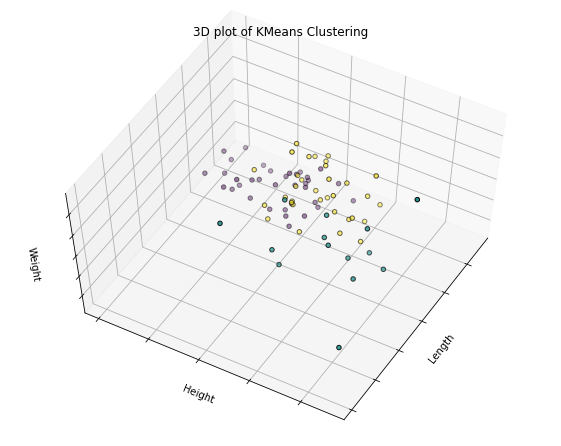

In [59]:
## Plot rotated here

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=60, azim=30)
#k3_model=KMeans(3)
#k3_model.fit(mydata_z)
#labels = k3_model.labels_
ax.scatter(mydata_z.iloc[:, 0], mydata_z.iloc[:, 1], mydata_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
# 3D plot easy to see seperation 
# See most of yellows, green and purple in diff groups 

Text(0.5, 0.92, '3D plot of KMeans Clustering')

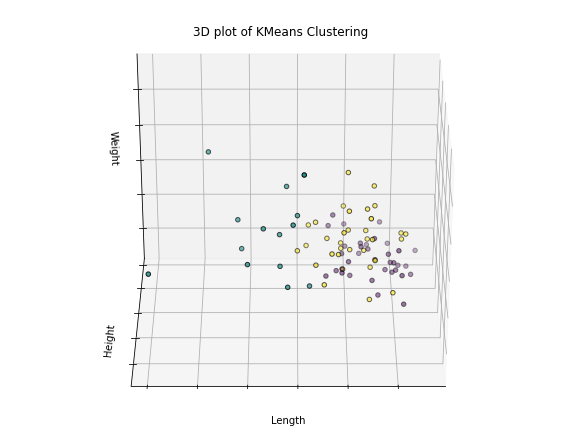

In [60]:
## Plot rotated here

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=90)
#k3_model=KMeans(3)
#k3_model.fit(mydata_z)
#labels = k3_model.labels_
ax.scatter(mydata_z.iloc[:, 0], mydata_z.iloc[:, 1], mydata_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
# 3D plot easy to see seperation 
# see seperation here too

In [ ]:
# If have more than 3D, then what do we do ? - Dimensionality space by PCA or Pair Plots or Box Plots for Business Interpretation 

In [62]:
# Final Model with k = 3
final_model=KMeans(3)
final_model.fit(mydata)
prediction=final_model.predict(mydata)

#Append the prediction 
mydata["GROUP"] = prediction
print("Groups Assigned : \n")
mydata[["adjdep", "GROUP"]]

Groups Assigned : 



,adjdep,GROUP
0,0.41865,1
1,0.51688,1
2,0.70699,1
3,0.65639,1
4,0.53518,1
...,...,...
77,1.14913,2
78,1.16443,0
79,2.24452,0
80,1.37153,2


In [63]:
# Calculate Silhouette Coefficient
metrics.silhouette_score(mydata_z, mydata["GROUP"], metric='euclidean')

0.3154806220010583

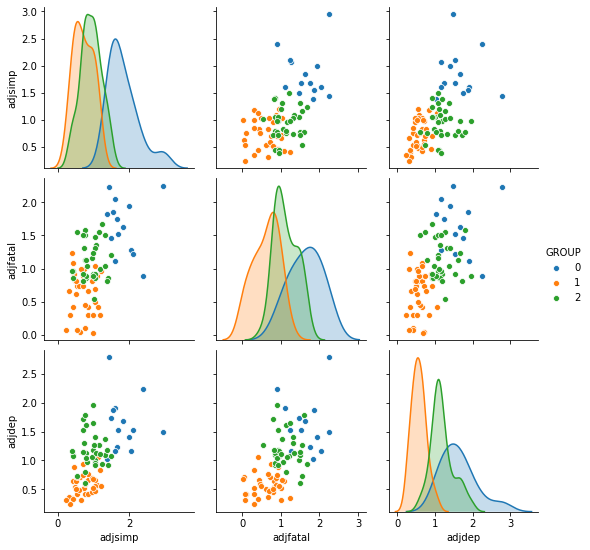

In [64]:
sns.pairplot(mydata,diag_kind='kde',hue='GROUP')  # See how clusters are being formed
# See Good Seperation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000277B9E8C6A0>,
      dtype=object)

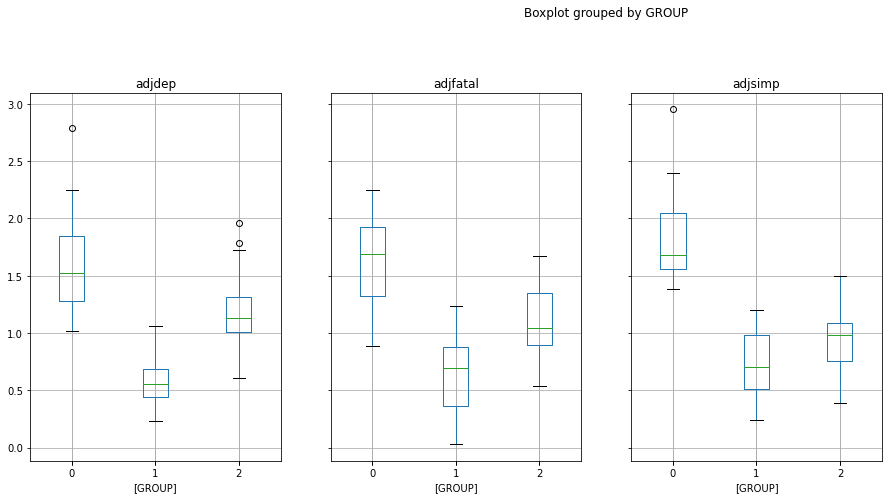

In [65]:
mydata.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))
# Interesting thing that we see variation here

In [66]:
#To determine if a relationship exists between black and white thinking(simplicity) and depression. 
mydata['adjsimp'].corr(mydata['adjdep'])
# Moderate positive correlation that is the question in the beginning

0.5726929734870994

The correlation coefficient above indicates that the relationship between black and white thinking and depression can be 
considered moderate and positive. This means that we can see a clear relationship between black and white thinking and 
Depression, although the relationship is not perfect. The fact that the correlation coefficient is positive, indicates that 
higher levels of black and white thinking is associated with higher levels of depression

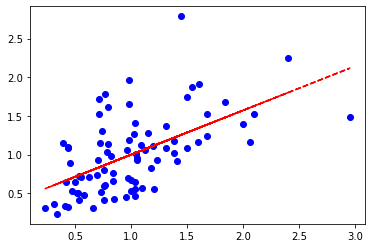

In [67]:
%matplotlib inline
import pandas as pd
plt.plot(mydata['adjsimp'], mydata['adjdep'], 'bo')
z = np.polyfit(mydata['adjsimp'], mydata['adjdep'],1)
p = np.poly1d(z)
plt.plot(mydata['adjsimp'], p(mydata['adjsimp']), "r--")

#geom_point()
# Show correlation from above - fit linear reg line well.
# Model clusters people based on personality clusters - likelihood of depression

In [67]:
# As you can see from the above graphic, although the data does not form a perfectly straight line, it does fall in a way that 
#indicates a positive relationship. Therefore, we can once again conclude that there is a relationship between black and white 
#thinking and depression. It is important to note, however, that correlation does not in any way indicate causality and is merely
#indicative of a relationship between the two.